---
# Übungszettel 2, Python Aufgabe
---

**ausgegeben am Mi 29.4.2020 12 Uhr, abzugeben bis Mi 6.5.2020 12 Uhr**

Bearbeitet von: Justus Multhaup

Zusammenarbeit mit: 

Übungsgruppe: Laura Strampe


---

Wir haben in der Vorlesung gesehen, wie man das elektrische Feld experimentell visualisieren kann und das elektrische Potential (genauer: die Spannung) messen kann.

Wir wollen uns hier damit beschäftigen wie man das elektische Potential und das Feld einer Anordnung von Punktladungen mit `numpy` und `matplotlib` darstellen kann. Wir beschränken uns dabei auf eine 2D Darstellung (also Darstellung eines ebenen Schnittes des 3D Raumes), analog zu dem gezeigten Vorlesungsexperiment.

1. Importieren Sie `numpy` und erzeugen Sie mit `np.linspace()` jeweils einen Raum für $x$ und $y$. Man wähle hier für beide ein Interval von -2 bis 2. `linspace` benötigt die Intervallgrenzen als das erste und zweite Argument. Nennen Sie die Räume `x` und `y`.

2. Erzeugen Sie aus den beiden Räumen mit `np.meshgrid()` Gitter des kombinierten $x,y$-Raums. `meshgrid` benötigt dabei die Räume `x` und `y` als Argumente und gibt dann 2 Gitter zurück, die wir `rx, ry` nennen wollen.

3. Schreiben Sie eine Funktion `potential(x0,y0,x,y)` die, mit Hilfe von `np.sqrt()`, das Potential einer Einheitspunktladung ($q=1$, Ort $(x_0,y_0)$) am Ort  $(x,y)$ berechnet. Der Einfachheit halber lassen wir hier die Vorfaktoren alle weg, so dass das Potential einfach $\frac{1}{\left| r-r_0 \right|}$ sei.

4. Berechnen Sie ein `np.array` mit dem kombinierten Potential von 3 Punktladungen mit $q_1=2$, $q_2=-1$ und $q_3=-1$ an den Orten $(0,0.5)$, $(0.5,-0.5)$ und $(-0.5,-1)$ *Tipp: erinnern Sie sich an das Superpositionsprinzip*. Wenn Sie alles bisher richtig gemacht haben, dann gibt `potential(0,0,rx,ry)` ein `array` mit dem Potential einer Einheitsladung ($q=1$, Ort $(0,0)$) auf unserem Gitter zurück.

5. Berechnen Sie das elektrische Feld des Potentials *Tipp: erinnern Sie sich wie das Feld aus dem Potential berechnet wird. Achten Sie auf Vorzeichen*. Nutzen Sie dazu die `np.gradient()` Funktion, die als Argument ein `np.array` nimmt und in alle Richtungen die ersten Ableitungen zurück gibt. In unserem Fall werden die ersten Ableitungen in $y$- und $x$-Richtung berechnet. Wir erwarten also zwei Rückgabewerte, die wir `dy_phi, dx_phi` nennen wollen.

6. Importieren Sie `matplotlib.pyplot` und sorgen Sie dafür, dass wir im Folgenden gleich skalierte Achsen haben (z.B. mit `plt.axes().set_aspect('equal')`).

7. Plotten Sie das elektrische Feld mit `plt.streamplot()`. `streamplot` benötigt mindestens 4 Argumente: das $x$- und $y$-Gitter und die Komponenten des Feldes in $x$- und $y$-Richtung. Nutzen Sie dafür die Ergebnisse aus *2.* und aus *5.*.

8. Plotten sie die Äquipotentiallinien mit `plt.contour()` in den gleichen Graphen. `contour` benötigt mindestens 3 Argumente: das $x$- und $y$-Gitter und das Potential. Nutzen Sie dazu die Ergebnisse aus *2.* und *4.*. Zusätzlich setze man als Argument die Farbe auf schwarz mit `colors='k'` und auf ähnliche Weise können wir mit mit dem Argument `levels` festlegen auf welchen Höhen beschriftet werden soll. `levels` erwartet dabei eine Liste oder ein `np.array` (z.B. aus `np.linspace`). Wählen Sie interessante Levels.

9. Ändern Sie den Code aus *8.* so, dass die Kontur-Linien beschriftet werden. Dabei wird z.B. aus `plt.contour(...)` dann `CS = plt.contour(...)`. Als zusätzliche Zeile muss dann noch `plt.clabel(CS)` ergänzt werden. `clabel()` ergänzt dabei für einen spezifizierten Konturenplot die Labels.

<a list of 12 text.Text objects>

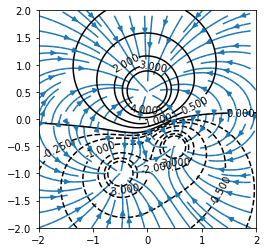

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
rx, ry = np.meshgrid(x,y)
q1 = 2
q2 = -1
q3 = -1

def potential(x0,y0,x,y):
    return 1/(np.sqrt((x - x0)**2 + (y - y0)**2))

######Berechnen des Arrays
pot = q1 * potential(0,0.5,rx,ry) + q2 * potential(0.5,-0.5,rx,ry) + q3 * potential(-0.5,-1,rx,ry)

dy_phi, dx_phi = np.gradient(pot)
feldx = dx_phi * pot
feldy = dy_phi * pot


plt.axes().set_aspect('equal')
plt.streamplot(rx,ry,feldx,feldy)
CS = plt.contour(rx,ry,pot,colors='k',levels = np.array([-4,-3,-2,-1,-0.5,-0.25,0,0.5,1,2,3,4]))
plt.clabel(CS)

---
**Erste Hilfe Python:**
* Online-Sprechstunde jeden Mittwoch im Semester von 15-17 Uhr über BigBlueButton
* Studiengruppe im StudIP mit dem Titel “Erste Hilfe Python der SUB Göttingen”
* Übersichts-Pad ( https://pad.gwdg.de/ErsteHilfePython ) als alternative Anlaufstelle